###**PROYEK MODELING PREDIKSI HARGA JUAL APARTEMEN DI KOTA DAEGU, KOREA SELATAN**

[Sumber data Daegu Apartment]([link text](https://github.com/EvanYT1992/Capstone-3-ML-Prediction-SalePrice-for-Apartment/blob/main/data_daegu_apartment.csv))

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation


### **Business Problem Understanding**

**Context**

Apartemen adalah salah satu solusi untuk kebutuhan perumahan masyarakat modern akibat terbatasnya lahan hunian dan padatnya aktivitas bisnis di daerah perkotaan. Oleh karena itu, akan sangat menarik untuk mengkaji harga apartemen yang dipengaruhi oleh berbagai faktor internal dan eksternal.

Individu atau perusahaan biasanya membuat penawaran unit apartemen. Para penawar dapat menjual unit di platform dengan menentukan harga apartemen mereka sendiri. Namun, cara ini cukup sulit bagi pemilik apartemen untuk menyesuaikan dengan harga pasar. Jika harga terlalu tinggi dibandingkan harga pasar, maka akan sulit untuk melakukan penjualan. Sebaliknya, jika terlalu rendah, pemilik akan kesulitan mendapatkan keuntungan maksimal.

Dataset ini memberikan peluang untuk menganalisis faktor-faktor yang memengaruhi harga jual apartemen. Analisis ini penting untuk membantu pemilik apartemen menentukan harga jual yang optimal, sehingga dapat bersaing di pasar sekaligus memaksimalkan keuntungan.



**Problem Statement**

Harga apartemen dipengaruhi oleh berbagai faktor, baik internal (karakteristik apartemen) maupun eksternal (lokasi dan fasilitas di sekitarnya). Tantangan utama adalah menentukan harga yang sesuai dengan pasar. Jika harga terlalu tinggi, apartemen sulit terjual. Sebaliknya, jika terlalu rendah, keuntungan maksimal sulit dicapai.

**Goals**

Membuat model prediktif untuk memprediksi harga jual apartemen (SalePrice) berdasarkan fitur-fitur yang tersedia. Model ini dapat membantu pemilik apartemen menentukan harga yang sesuai dengan nilai pasar.

**Analytic Approach**

Jadi, yang perlu kita lakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan satu properti dengan yang lainnya.

Selanjutnya, kita akan membangun suatu model regresi yang akan membantu pemilik apartemen untuk dapat menyediakan 'tool' prediksi harga jual apartemen yang sesuai, yang mana akan berguna untuk pemilik apartemen dalam menentukan harga jual apartemennya sehingga tidak terlalu mahal dan tidak terlalu murah.

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga jual apartemen sesuai dengan limitasi fitur yang digunakan.

Selain itu, kita juga bisa menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

### **Data Understanding**

- Dataset merupakan data apartemen di Daegu, Korea Selatan pada tahun 2022.
- Setiap baris data merepresentasikan informasi terkait properti dan kemudahan aksesnya.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Hallway Type| Object |  Jenis lorong atau tipe apartemen. |
| TimeToSubway | Object | Waktu yang dibutuhkan untuk mencapai stasiun subway terdekat. |
| SubwayStation | Object | Nama stasiun subway terdekat. |
| N_FacilitiesNearBy(ETC) | Float | Jumlah fasilitas umum di sekitar. |
| N_FacilitiesNearBy(PublicOffice) | Float | Jumlah fasilitas kantor layanan publik di sekitar. |
| N_SchoolNearBy(University)| Float |Jumlah universitas di sekitar.|
| N_Parkinglot(Basement)| Float | Jumlah tempat parkir (di basement).|
| YearBuilt:  | Integer | Tahun dibangunnya apartemen. |
| N_FacilitiesInApt | Integer |  Jumlah fasilitas yang ada di dalam apartemen.|
| Size(sqft) | Integer | Ukuran apartemen (dalam kaki persegi). |
|SalePrice| Integer | Harga apartemen (dalam Won).|


<br>

In [1]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pip install category_encoders

In [2]:
# Load dataset
df = pd.read_csv('/content/data_daegu_apartment.csv')
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


In [3]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (4123, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4),

#### **Exploratory Data Analysis**

**Distribusi Harga Jual Apartemen**

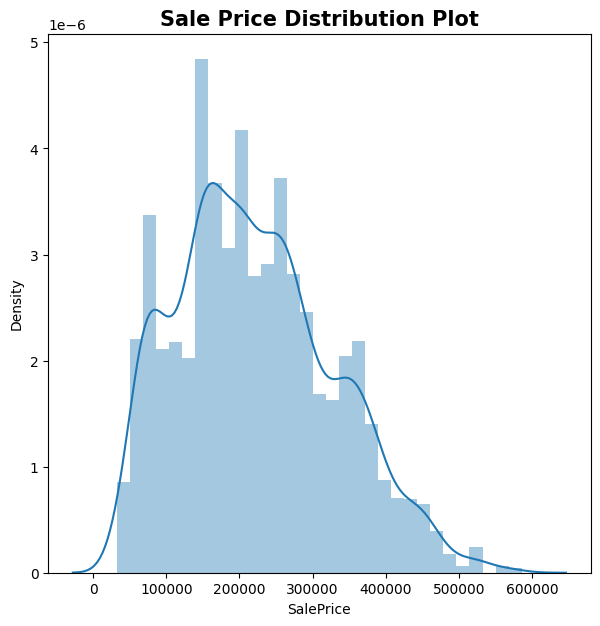

In [4]:
# Plot distribusi fitur 'price'
plt.figure(figsize=(7, 7))
sns.distplot(df['SalePrice'])
plt.title('Sale Price Distribution Plot', size=15, weight='bold');

Berdasarkan plot distribusi harga jual apartemen di atas, terlihat bahwa terdapat 'right-skewed distribution'. Dengan kata lain, terdapat skewness positif pada fitur SalePrice.

**Types of apartment related to price**

In [5]:
# Cek jumlah apartement berdasarkan HallwayType, SubwayStation, dan YearBuilt.
print(f"Jumlah Apartemen di tiap hallway type:\n{df['HallwayType'].value_counts()}")
print(f"\nJumlah tiap Apartement pada masing2 Subway station:\n{df['SubwayStation'].value_counts()}")
print(f"\nJumlah tiap Apartement pada masing- masing tahun pembangunan:\n{df['YearBuilt'].value_counts()}")

Jumlah Apartemen di tiap hallway type:
HallwayType
terraced    2528
mixed       1131
corridor     464
Name: count, dtype: int64

Jumlah tiap Apartement pada masing2 Subway station:
SubwayStation
Kyungbuk_uni_hospital    1152
Myung-duk                1044
Banwoldang                529
Bangoge                   502
Sin-nam                   467
no_subway_nearby          290
Chil-sung-market           74
Daegu                      65
Name: count, dtype: int64

Jumlah tiap Apartement pada masing- masing tahun pembangunan:
YearBuilt
2007    853
2005    502
2006    460
1993    451
1992    326
2013    322
2014    292
1986    273
2008    203
2009    171
2015     92
1997     67
1985     51
1978     49
2003      7
1980      4
Name: count, dtype: int64


kebanyakan apartemen yang dijual bertipe terraced, kemudian mixed, dan yang terakhir corridor. Serta kebanyakan apartemen yang ditawarkan berada di dekat stasiun subway Kyungbuk_uni_hospital dan stasiun subway Myung-duk.

Penawaran berdasarkan tahun pembangunan apartemen dengan skala paling besar ada di tahun 2007 yaitu sekitar 853 apartemen baru yang dibangun.

In [6]:
df.groupby(['HallwayType', 'SubwayStation'])['SubwayStation'].count()

HallwayType  SubwayStation        
corridor     Banwoldang                 50
             Daegu                      51
             Kyungbuk_uni_hospital      49
             Myung-duk                 222
             Sin-nam                    51
             no_subway_nearby           41
mixed        Bangoge                   502
             Chil-sung-market           74
             Myung-duk                 555
terraced     Banwoldang                479
             Daegu                      14
             Kyungbuk_uni_hospital    1103
             Myung-duk                 267
             Sin-nam                   416
             no_subway_nearby          249
Name: SubwayStation, dtype: int64

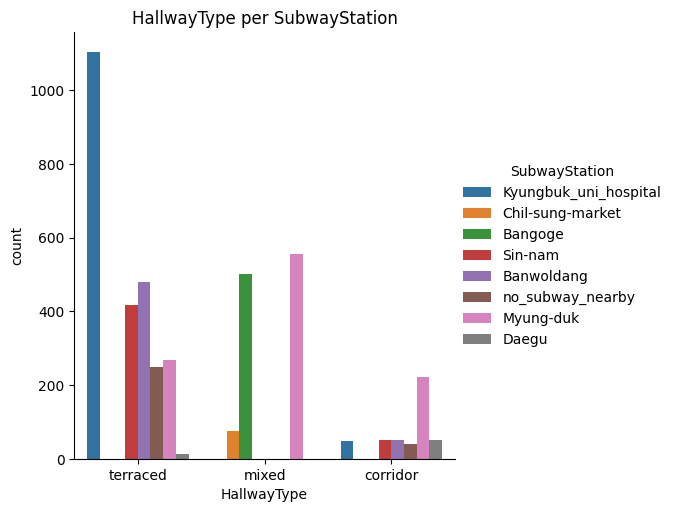

In [7]:
sns.catplot(x='HallwayType', kind='count', hue='SubwayStation', data=df);
plt.title('HallwayType per SubwayStation');

Dari catplot diatas dapat kita lihat bahwa apartemen yang dijual di area stasiun kyungbuk uni hospital banyak yang bertipe terraced sebanyak 1013 unit.

In [8]:
# Cek median price untuk tiap HallwayType
df_median_price = df.groupby(by=['HallwayType']).agg({'SalePrice':'median'}).reset_index()
df_median_price = df_median_price.set_index('HallwayType')
df_median_price = df_median_price.sort_values('SalePrice', ascending =False)
df_median_price.head()

,SalePrice
HallwayType,
terraced,264601.0
mixed,153539.0
corridor,74557.0


SubwayStation,Bangoge,Banwoldang,Chil-sung-market,Daegu,Kyungbuk_uni_hospital,Myung-duk,Sin-nam,no_subway_nearby
HallwayType,,,,,,,,
corridor,NaN,101769.0,NaN,70796.0,163716.0,65486.0,87610.0,58407.0
mixed,167035.0,NaN,88495.0,NaN,NaN,149557.0,NaN,NaN
terraced,NaN,337168.0,NaN,300884.0,244911.0,271681.0,256637.0,243362.0


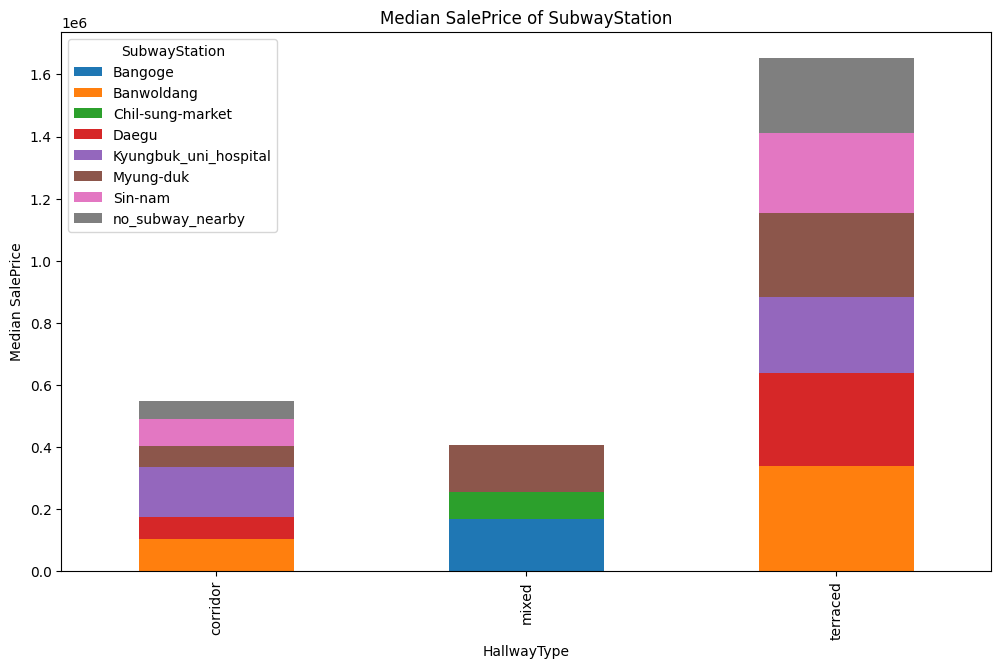

In [9]:
# Plot harga median untuk tiap Hallwaytype apartement di setiap subway station
from IPython.display import display

neighbour_pivot = df.pivot_table(index='HallwayType', columns='SubwayStation', values='SalePrice', aggfunc='median')
display(neighbour_pivot)

pivot_plot = neighbour_pivot.plot.bar(stacked=True, figsize=(12, 7))
pivot_plot.set_xlabel('HallwayType')
pivot_plot.set_ylabel('Median SalePrice')
pivot_plot.set_title('Median SalePrice of SubwayStation');

Dari hasil pivot plot diatas, dapat kita lihat bahwa tipe hallway yang dijual pada area dekat stasiun subway Bangoge dan Chilsung market hanya tipe mixed, sedangkan pada area dekat stasiun subway myungduk yang dijual semua tipe yaitu koridor, mixed, dan terraced.

Sementara itu pada area sekitar stasiun subway Banwoldang, Daegu, Kyungbuk uni hospital, sin nam, dan pada area yg tidak ada stasiun di dekatnya tipe hallway yang ditawarkan hanya yang bertipe koridor dan terraced saja. Median Harga jual  untuk tipe hallway terraced lebih tinggi daripada koridor. Hal ini bisa terjadi karena:

*  Fasilitas tambahan yang dimiliki tipe terrace (teras pribadi, ruang luar,
pemandangan, dan sirkulasi udara).
*  Tingkat privasi dan kenyamanan yang lebih tinggi.
*  Persepsi pasar terhadap kemewahan dan eksklusivitas terrace apartment.






### **Data Preprocessing**

Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:
- Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
- Melakukan treatment terhadap missing value jika ada. Bisa dengan cara men-drop fiturnya jika memang tidak dibutuhkan atau bisa juga dengan mengimputasi dengan nilai yang paling masuk akal berdasarkan kasusnya.
- Mengecek apakah ada duplikasi data. jika ada maka kita akan membuang data yang duplikat.

Untuk proses data preprocessing dan feature engineering, kita akan menggunakan dataframe hasil duplikasi dari dataframe yang sebelumnya digunakan.

In [10]:
# Membuat duplikasi dataframe
df_model = df.copy()

In [11]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,HallwayType,object,0,0.0,3,"[mixed, terraced]"
1,TimeToSubway,object,0,0.0,5,"[15min~20min, 5min~10min]"
2,SubwayStation,object,0,0.0,8,"[Bangoge, Daegu]"
3,N_FacilitiesNearBy(ETC),float64,0,0.0,4,"[0.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),float64,0,0.0,8,"[7.0, 2.0]"
5,N_SchoolNearBy(University),float64,0,0.0,6,"[2.0, 0.0]"
6,N_Parkinglot(Basement),float64,0,0.0,20,"[76.0, 1270.0]"
7,YearBuilt,int64,0,0.0,16,"[2005, 2007]"
8,N_FacilitiesInApt,int64,0,0.0,9,"[7, 10]"
9,Size(sqf),int64,0,0.0,89,"[907, 1085]"


**Missing Value**

In [12]:
# Check for missing values
missing_values = df_model.isnull().sum()

# Print the number of missing values for each column
print(missing_values)

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64


Setelah kita mengecek missing value, ternyata kolom yang kita memiliki semuanya terisi, tidak ada data yang kosong.

oleh karena itu selanjutnya kita dapat mengecek data duplikat pada data yang kita miliki.

**Data Duplication**

In [13]:
# Check for duplicate rows
duplicates = df_model.duplicated()

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicates.sum()}")

# Display the duplicate rows
df_model[duplicates]

Number of duplicate rows: 1422


,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
55,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
56,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,371681
122,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,644,149274
127,terraced,0-5min,Banwoldang,0.0,2.0,2.0,524.0,2007,4,1394,256637
133,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,644,168141
...,...,...,...,...,...,...,...,...,...,...,...
4113,terraced,5min~10min,Daegu,0.0,3.0,2.0,400.0,2015,7,644,300884
4114,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,86725
4115,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141


In [14]:
# Hapus duplikat dengan mempertahankan baris pertama dari setiap duplikat
df_model = df_model.drop_duplicates(keep='first')

# Tampilkan jumlah baris setelah menghapus duplikat
print(f"Jumlah baris setelah menghapus duplikat: {df_model.shape[0]}")

Jumlah baris setelah menghapus duplikat: 2701


Dari hasil diatas dapat diketahui bahwa ada sebanyak 1422 baris yang duplicate, walaupun jumlah nya 1/3 dari data set kita, namun jika data tersebut merupakan data yang duplikat maka sebaiknya kita hapus saja.

- hal ini dilakukan karena data yang duplikat tidak memberikan informasi tambahan, data ini dapat menjadi redundansi yang hanya akan menambah ukuran dataset tanpa meningkatkan kualitas model.
- Redundansi dapat menyebabkan model "belajar berlebihan" pada pola tertentu, sehingga menghasilkan bias yang tidak akurat.
- Proses training akan lebih lambat tanpa peningkatan kinerja.
- Model yang dilatih dengan data duplikasi dapat memberikan hasil tidak general karena terlalu sering "melihat" data yang sama.


**Data Correlation**

In [15]:
# Cek deskriptif statistik fitur numerikal
num_features = [feature for feature in df_model.columns if ((df_model[feature].dtypes != 'object'))]
df_model[num_features].describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000
mean,1.890411,4.027027,2.680489,533.746390,2002.358386,5.713439,984.028878,229511.365790
std,2.153168,1.887486,1.504470,418.224859,9.151949,2.386552,391.982619,105079.891321
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,181.000000,1993.000000,4.000000,743.000000,153539.000000
50%,1.000000,4.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,221238.000000
75%,5.000000,5.000000,4.000000,798.000000,2007.000000,7.000000,1167.000000,300884.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


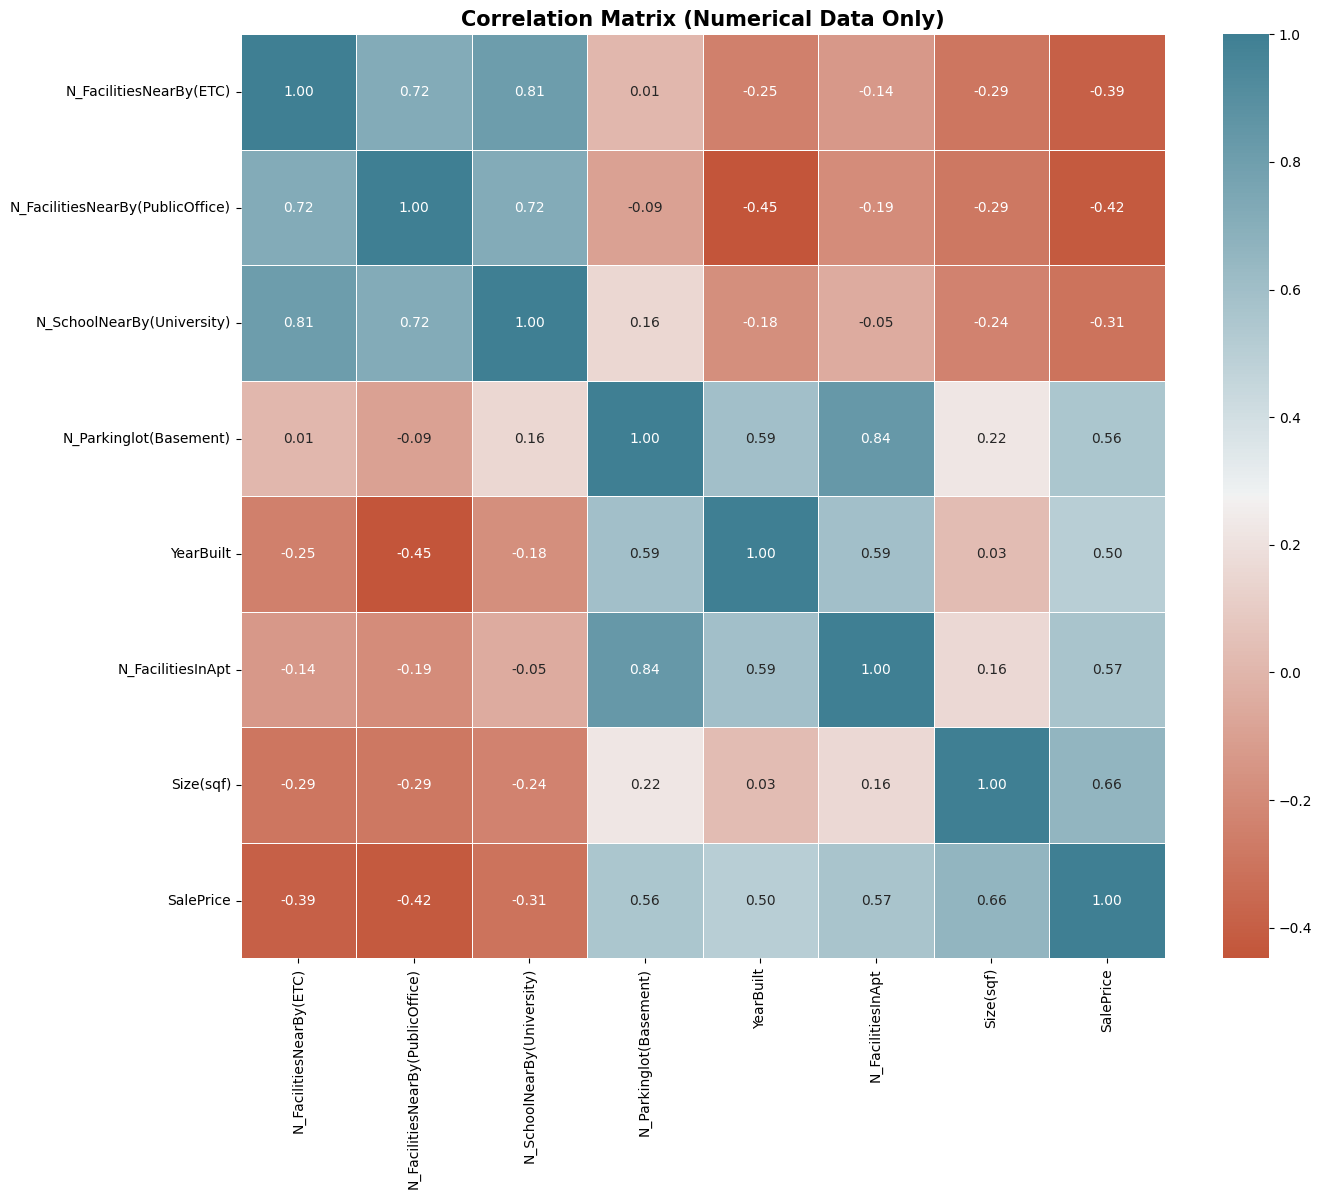

In [16]:
# Seleksi hanya kolom numerik
df_numerical = df_model.select_dtypes(include=['number'])

# Membuat matriks korelasi Pearson
corr = df_numerical.corr(method='pearson')

# Plot heatmap korelasi
plt.figure(figsize=(15, 12))
palette = sns.diverging_palette(20, 220, n=256)
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix (Numerical Data Only)', size=15, weight='bold')
plt.show()

Skala Umum Interpretasi Koefisien Korelasi (Pearson's r):

- 0,00 – 0,19: Hubungan sangat lemah (hampir tidak ada hubungan).
- 0,20 – 0,39: Hubungan lemah.
- 0,40 – 0,59: Hubungan sedang.
- 0,60 – 0,79: Hubungan kuat.
- 0,80 – 1,00: Hubungan sangat kuat.

Correlation matrix menunjukkan bahwa fitur Size(sqf) memiliki korelasi yang cukup kuat terhadap fitur SalePrice dengan nilai 0.66. dimana semakin besar ukurannya, maka semakin mahal juga harga jual apartement tersebut.

Tahun dibangun, jumlah fasilitas dan jumlah tempat parkir di basement juga berpengaruh sedang terhap harga jual.

sedangkan untuk jumlah fasilitas terdekat, public office, dan universitas berpengaruh lemah dengan sifat negative, yang mana semakin banyak jumlahnya maka harga akan semakin menurun, dan sebaliknya. Hal ini kemungkinan dapat terjadi dikarenakan ketika seseorang ingin membeli apartemen, yang dicari adalah ketenangan sehingga tidak ingin memiliki lingkungan yang terlalu ramai aktifitas di area tersebut.

**Outliers Detection**

Selanjutnya, kita akan mengecek distribusi data dan outliers untuk tiap numerikal fitur. Jika distribusinya memiliki skewness yang tinggi, salah satu cara yang dapat kita lakukan untuk menguranginya adalah dengan melakukan rekayasa pada tiap fiturnya.

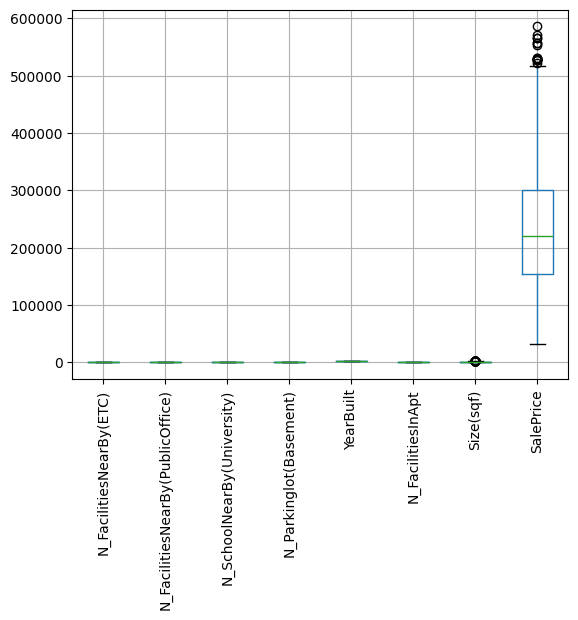

In [17]:
# Plot boxplot untuk mengecek outliers
df_model.boxplot(rot=90);

Terlihat ada outliers pada beberapa fitur. Dalam project ini, untuk membuat dataset yang lebih bersih dari outliers, saya akan melakukan beberapa rekayasa data pada fitur-fitur dengan mempertimbangkan kombinasi antara hasil dari metode IQR dan juga domain knowledge. Nantinya, model yang dihasilkan hanya terbatas dapat memprediksi listing baru yang nilai-nilainya pada rentang data berdasarkan 'clean dataset' ini saja. Di luar rentang data, hasil prediksi dari model akan menjadi bias.

In [18]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')

In [19]:
# Outliers pada fitur SalePrice
find_anomalies(df_model['SalePrice'])

IQR: 147345.0
limit_bawah: -67478.5
limit_atas: 521901.5


In [20]:
# Outliers pada fitur N_FacilitiesNearBy(ETC)
find_anomalies(df_model['N_FacilitiesNearBy(ETC)'])

IQR: 5.0
limit_bawah: -7.5
limit_atas: 12.5


In [21]:
# Outliers pada fitur N_FacilitiesNearBy(PublicOffice)
find_anomalies(df_model['N_FacilitiesNearBy(PublicOffice)'])

IQR: 2.0
limit_bawah: 0.0
limit_atas: 8.0


In [22]:
# Outliers pada fitur N_SchoolNearBy(University)
find_anomalies(df_model['N_SchoolNearBy(University)'])

IQR: 2.0
limit_bawah: -1.0
limit_atas: 7.0


In [23]:
# Outliers pada fitur N_Parkinglot(Basement)
find_anomalies(df_model['N_Parkinglot(Basement)'])

IQR: 617.0
limit_bawah: -744.5
limit_atas: 1723.5


In [24]:
# Outliers pada fitur YearBuilt
find_anomalies(df_model['YearBuilt'])

IQR: 14.0
limit_bawah: 1972.0
limit_atas: 2028.0


In [25]:
# Outliers pada fitur N_FacilitiesInApt
find_anomalies(df_model['N_FacilitiesInApt'])

IQR: 3.0
limit_bawah: -0.5
limit_atas: 11.5


In [26]:
# Outliers pada fitur Size(sqf)
find_anomalies(df_model['Size(sqf)'])

IQR: 424.0
limit_bawah: 107.0
limit_atas: 1803.0


Selanjutnya, kita dapat memulai feature engineering terhadap fitur-fitur numerikal yang terindikasi ada outlier yaitu fitur SalePrice dan Size(sqf).

**Sale Price**

In [27]:
# Cek deskriptif statistik kolom SalePrice
df_model['SalePrice'].describe()

,SalePrice
count,2701.000000
mean,229511.365790
std,105079.891321
min,32743.000000
25%,153539.000000
50%,221238.000000
75%,300884.000000
max,585840.000000


In [28]:
# Cek SalePrice > 521901.5 won
df_model[df_model['SalePrice'] > 521901.5].count()['SalePrice']

17

Terlihat bahwa 75% data pada kolom SalePrice bernilai kurang dari 300.884 won, sedangkan nilai maksimalnya adalah 585.840 won. Tentu terdapat skewness pada distribusinya, yaitu tail yang memanjang di sebelah kanan (positive skewness). Terdapat 17 data yang nilai price-nya lebih besar dari 521.901,5 won (batas atas berdasarkan metode IQR). Oleh karena itu, data yang memiliki price lebih besar dari  521.901,5 won tidak akan dimasukkan ke dalam pemodelan, sehingga skewness-nya pun akan berkurang. Hal ini tentu akan menjadi limitasi untuk model yang nantinya dibangun.

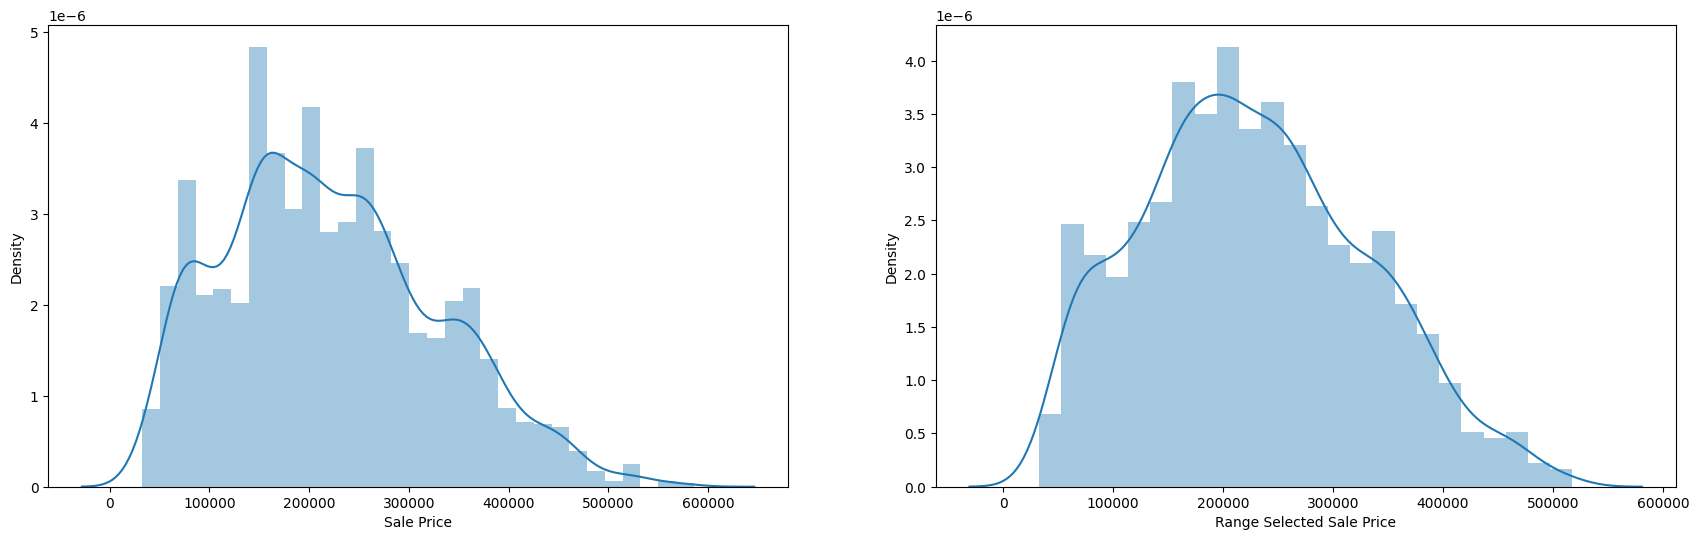

In [29]:
# Melakukan filtering pada data
df_model = df_model[(df_model['SalePrice'] <= 521901.5)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['SalePrice'], ax=axes[0])
sns.distplot(df_model['SalePrice'], ax=axes[1])
axes[0].set_xlabel('Sale Price')
axes[1].set_xlabel('Range Selected Sale Price');

In [30]:
# Cek deskriptif statistik kolom 'SalePrice' setelah filtering
df_model['SalePrice'].describe()

,SalePrice
count,2684.000000
mean,227524.476528
std,102380.847211
min,32743.000000
25%,153097.000000
50%,220088.000000
75%,297455.500000
max,517699.000000


**Size(sqf)**

In [31]:
# Cek deskriptif statistik kolom Size
df_model['Size(sqf)'].describe()

,Size(sqf)
count,2684.000000
mean,978.779434
std,387.404559
min,135.000000
25%,743.000000
50%,910.000000
75%,1167.000000
max,2337.000000


In [32]:
# Cek Size(sqf) > 1803.0 square feet
df_model[df_model['Size(sqf)'] > 1803.0].count()['Size(sqf)']


73

Terlihat bahwa 75% data pada kolom Size(sqf) bernilai kurang dari 1167 sqf, sedangkan nilai maksimalnya adalah 2377 sqf. Tentu terdapat skewness pada distribusinya, yaitu tail yang memanjang di sebelah kanan (positive skewness). Terdapat 73 data yang nilai price-nya lebih besar dari 1803 sqf (batas atas berdasarkan metode IQR). Oleh karena itu, data yang memiliki size lebih besar dari  1803 sqf tidak akan dimasukkan ke dalam pemodelan, sehingga skewness-nya pun akan berkurang. Hal ini tentu akan menjadi limitasi untuk model yang nantinya dibangun selain SalePrice.


Ukuran penthouse di Daegu, Korea Selatan bervariasi tergantung pada lokasi dan fasilitas. Namun, secara umum, ukuran penthouse di daerah ini berkisar antara 100 hingga 300 meter persegi, dengan harga yang sangat bergantung pada lokasi dan spesifikasi unit.

Untuk penthouse mewah di Daegu, harga dapat mulai dari sekitar 1,5 miliar KRW (sekitar 1 juta USD) hingga lebih dari 5 miliar KRW (sekitar 3,5 juta USD) untuk properti yang lebih besar dan lebih mewah ​
[SOTHEBY'S REALTY](https://https://www.sothebysrealty.com/eng/sales/kor) ,  
 [​
SOTHEBY'S REALTY](https://https://www.sothebysrealty.com/eng/sales/da-kor)
. Harga ini dapat bervariasi lebih lanjut tergantung pada faktor-faktor seperti lokasi, tahun pembangunan, dan fasilitas tambahan yang ditawarkan. Jika Anda tertarik untuk melihat lebih banyak opsi, Anda dapat menemukan daftar properti mewah di Daegu melalui agen properti internasional seperti Sotheby's.

Artikel diatas memperkuat keputusan untuk menghilangkan outlier

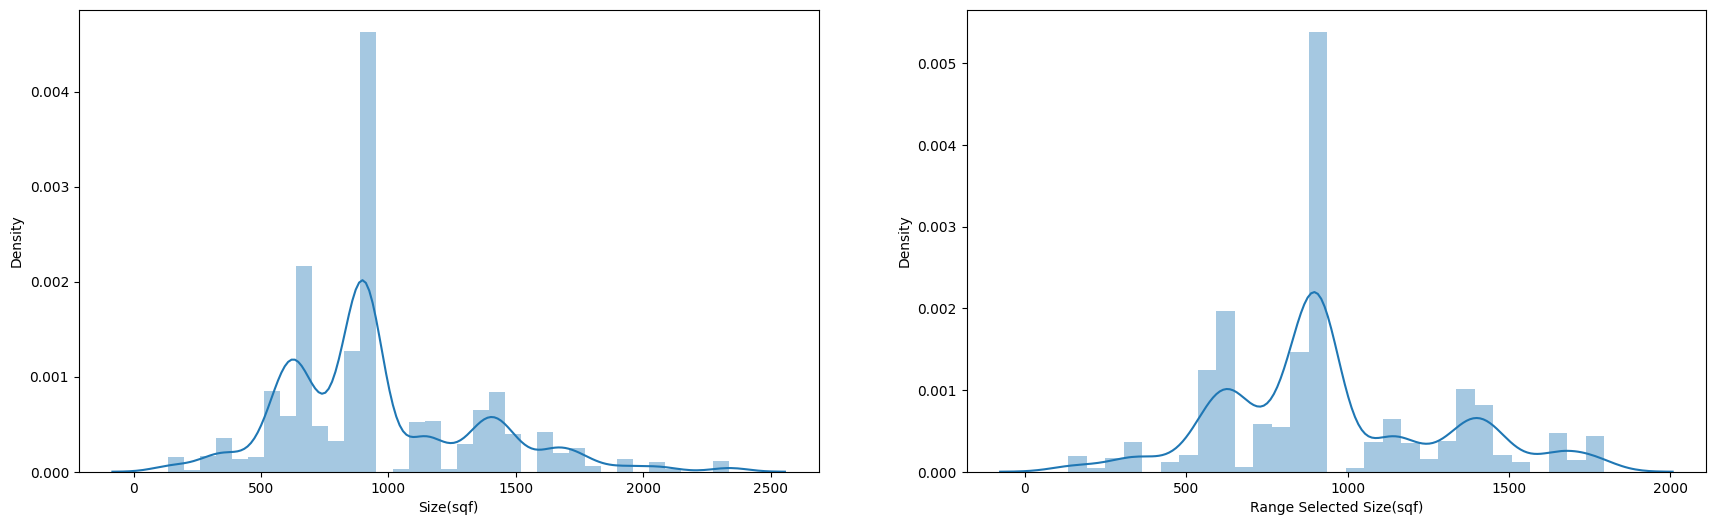

In [33]:
# Melakukan filtering pada data
df_model = df_model[(df_model['Size(sqf)'] <= 1803)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Size(sqf)'], ax=axes[0])
sns.distplot(df_model['Size(sqf)'], ax=axes[1])
axes[0].set_xlabel('Size(sqf)')
axes[1].set_xlabel('Range Selected Size(sqf)');

In [34]:
# Cek deskriptif statistik kolom 'Size(sqf)' setelah filtering
df_model['Size(sqf)'].describe()

,Size(sqf)
count,2611.000000
mean,946.851015
std,340.673791
min,135.000000
25%,743.000000
50%,910.000000
75%,1149.000000
max,1796.000000


**Clean Dataset**

In [35]:
# Cek dataset yang sudah bersih
df_model.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


In [36]:
# Cek kembali info dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2611 entries, 0 to 4121
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       2611 non-null   object 
 1   TimeToSubway                      2611 non-null   object 
 2   SubwayStation                     2611 non-null   object 
 3   N_FacilitiesNearBy(ETC)           2611 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  2611 non-null   float64
 5   N_SchoolNearBy(University)        2611 non-null   float64
 6   N_Parkinglot(Basement)            2611 non-null   float64
 7   YearBuilt                         2611 non-null   int64  
 8   N_FacilitiesInApt                 2611 non-null   int64  
 9   Size(sqf)                         2611 non-null   int64  
 10  SalePrice                         2611 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 244.8+ KB


Pada akhirnya, tersisa 2611 baris data yang akan digunakan untuk pemodelan. Ini berarti lebih dari 30% data sudah tereliminasi sesuai dengan asumsi dan argumen yang disampaikan di proses-proses sebelumnya.

### **Modeling**

In [37]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 3.3 MB/s eta 0:00:00


In [38]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

####**Encoding**

Agar dapat menggunakan semua fitur yang dipilih, maka fitur-fitur kategorikal harus diubah menjadi fitur numerikal. Kita dapat menggunakan ColumnTransformer untuk dapat mengubah tipe datanya, yang mana nanti dapat diaplikasikan pada pipeline model.

In [39]:

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['HallwayType', 'TimeToSubway', 'SubwayStation']),
], remainder='passthrough')

Dalam encoding ini, saya menggunakan One Hot encoding karena kolom bersifat kategory dan nilai unique nya relatif sedikit kurang dari 10. serta keuntungannya tidak memperkenalkan hubungan palsu antar kategori.

####**Data Splitting**

In [40]:
# Memisahkan data independen variabel dengan target
X = df_model.drop(['SalePrice'], axis=1)
y = df_model['SalePrice']

####**Train and Test Splitting**

In [41]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=1)

####**Choose a Benchmark Model**

In [42]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:

    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_root_mean_squared_error',
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_error',
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_percentage_error',
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-50784.66303304 -49881.08354378 -55614.12070443 -53242.8197608
 -52664.62998954] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-41118.26615555 -40099.0938508  -44748.86182896 -42097.19998534
 -42532.47847864] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.21930459 -0.19530459 -0.23923217 -0.20525684 -0.20656822] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-50686.05900144 -50257.24553691 -48804.04963279 -51220.06952633
 -49984.55404567] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-40475.69473355 -39548.66220887 -37933.47199481 -39935.88931388
 -39464.95868242] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
 

Untuk scaling datanya kita menggunakan standart scaller karena setelah pembersihan outlier, distribusi data yang kita punya sudah mendekati normal.

In [43]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-52437.463406,2002.906996,-42119.180060,1560.070630,-0.213133,0.015114
1,KNN Regressor,-50190.395549,809.284301,-39471.735387,848.008392,-0.198765,0.006249
2,DecisionTree Regressor,-45712.082497,382.214777,-36525.602117,280.772195,-0.185379,0.006654
3,RandomForest Regressor,-45798.441325,309.573928,-36569.598230,312.106837,-0.186141,0.008251
4,XGBoost Regressor,-45731.065410,347.912909,-36530.409185,310.683979,-0.185700,0.007512


Penjelasan Kolom:

Model: Nama algoritma regresi yang digunakan.

Mean_RMSE: Rata-rata Root Mean Squared Error (RMSE) dari validasi silang.
Mengukur rata-rata kesalahan kuadrat akar. Semakin kecil, semakin baik performanya.

Std_RMSE: Standar deviasi dari RMSE di seluruh lipatan validasi silang.
Menunjukkan seberapa konsisten performa model antar lipatan.

Mean_MAE: Rata-rata Mean Absolute Error (MAE).
Rata-rata kesalahan absolut dalam satuan target. Lebih tahan terhadap outlier dibanding RMSE.

Std_MAE: Standar deviasi dari MAE di seluruh lipatan validasi silang.

Mean_MAPE: Rata-rata Mean Absolute Percentage Error (MAPE).
Kesalahan absolut dalam bentuk persentase, semakin kecil semakin baik.

Std_MAPE: Standar deviasi dari MAPE di seluruh lipatan validasi silang.


Analisis Hasil:

Analisis Berdasarkan Metrik
1. Linear Regression

RMSE: -52,437 (tertinggi, menunjukkan performa buruk).<br>
MAE: -42,119 (tertinggi, kurang akurat dibanding model lain).<br>
MAPE: -21.31% (paling tinggi, menunjukkan kesalahan relatif lebih besar).<br>
Std Dev: Memiliki standar deviasi yang cukup tinggi pada semua metrik, menunjukkan inkonsistensi performa antar lipatan.<br>
Kesimpulan: Masih menjadi model dengan performa terburuk. Tidak cocok untuk data dengan pola non-linear yang kompleks.

2. KNN Regressor

RMSE: -50,190 (peningkatan dibanding Linear Regression, tetapi masih tertinggi kedua).<br>
MAE: -39,471 (cukup baik, tetapi masih tertinggal dari model berbasis pohon).<br>
MAPE: -19.88% (kesalahan relatif lebih kecil dibanding Linear Regression).<br>
Std Dev: Memiliki deviasi rendah, menunjukkan stabilitas hasil antar lipatan.
Kesimpulan: Meningkat dibanding Linear Regression, tetapi masih tertinggal dari model berbasis pohon dalam hal akurasi dan generalisasi.

3. DecisionTree Regressor

RMSE: -45,712 (salah satu yang terendah, menunjukkan akurasi tinggi).<br>
MAE: -36,525 (terbaik pertama, menunjukkan kesalahan absolut rendah).<br>
MAPE: -18.54% (terbaik pertama, lebih kecil dibanding Random Forest).<br>
Std Dev: Deviasi rendah, menunjukkan model ini cukup stabil antar lipatan.<br>
Kesimpulan: Model ini memiliki akurasi tinggi dan stabilitas yang baik. Pilihan yang solid jika interpretabilitas penting.

4. RandomForest Regressor

RMSE: -45,798 (hampir setara dengan DecisionTree dan XGBoost).
<br>MAE: -36,570 (terbaik ketiga, sangat mendekati DecisionTree dan XGBoost).
<br>MAPE: -18.61% (sedikit lebih tinggi dari DecisionTree).
<br>Std Dev: Terendah di RMSE dan MAE, menunjukkan stabilitas antar lipatan terbaik.<br>Kesimpulan: Performanya sangat baik, terutama dari sisi stabilitas. Pilihan utama jika konsistensi hasil diutamakan.

5. XGBoost Regressor

RMSE: -45,731 (sangat kompetitif, hampir identik dengan RandomForest dan DecisionTree).<br>
MAE: -36,530 (terbaik kedua, sangat mendekati DecisionTree).<br>
MAPE: -18.57% (sangat mirip dengan DecisionTree, sedikit lebih baik dari RandomForest).<br>
Std Dev: Deviasi sedikit lebih tinggi dibanding RandomForest tetapi tetap rendah.<br>
Kesimpulan: Memberikan hasil yang sangat mirip dengan RandomForest dan DecisionTree. Lebih efisien untuk dataset besar.


Kesimpulan Analisis<br>

Model dengan Performa Terbaik:

Decision Tree Regressor memiliki nilai metrik terbaik secara keseluruhan, dengan Mean_RMSE, Mean_MAE, dan Mean_MAPE terendah.
Namun, model ini cenderung overfitting, terutama pada dataset kecil atau kompleks.

Model Paling Stabil:

Random Forest Regressor memiliki standar deviasi terendah, menunjukkan hasil prediksi yang konsisten. Cocok untuk aplikasi yang memerlukan prediksi yang stabil.

Model Alternatif Terbaik:

XGBoost Regressor memiliki performa yang hampir identik dengan Decision Tree dan Random Forest, tetapi dengan keunggulan efisiensi komputasi dan fleksibilitas.

Model dengan Performa Kurang Baik:

Linear Regression dan KNN Regressor memberikan hasil yang tidak memuaskan, dengan kesalahan yang jauh lebih tinggi dibandingkan model lainnya.


- Selanjutnya, akan dilakukan prediksi pada test set dengan 3 benchmark model terbaik, yaitu XGBoost, RandomForest, dan DecisionTree

#####**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model XGBoost, Random Forest, dan DecisionTree.

In [44]:
# Benchmark 3 model terbaik
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1),
    'DecisionTree' : DecisionTreeRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,44318.596679,35616.073711,0.190959
RandomForest,44350.019375,35646.422424,0.191390
DecisionTree,44319.306591,35615.777209,0.190948


- Ketika dilakukan prediksi pada test set, performa XGBoost dan DecisionTree sangat Mirip, XGB memiliki hasil RMSE yang lebih kecil dari pada DecisionTree, namun memiliki nilai MAE dan MAPE yang sedikit lebih besar daripada DEcisionTree.

- Selanjutnya mari kita cek hasilnya jika dilakukan Tuning dengan menggunakan Hyperparameter, sehingga kita dapat memilih model mana yang akan kita pilih dan gunakan.


#####**Hyperparameter Tuning DecisionTree VS XGBoost**

**Hyperparameter Tuning**

Kita akan melakukan hyperparameter tuning sebagai model akhir untuk meningkatkan hasil akurasi yang akan kita dapat.

**Hyperparameter tuning DecisionTree**

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import pandas as pd
import numpy as np

# Ruang Hyperparameter untuk Decision Tree
hyperparam_space_dt = {
    'model__max_depth': list(range(1, 21)),  # Kedalaman pohon
    'model__min_samples_split': list(range(2, 21)),  # Minimum sampel untuk split
    'model__min_samples_leaf': list(range(1, 21)),  # Minimum sampel dalam daun
    'model__criterion': ['squared_error', 'friedman_mse'],  # Fungsi pemisahan
}

# Inisialisasi Model Decision Tree
decision_tree = DecisionTreeRegressor(random_state=1)

# Membuat Pipeline
estimator_dt = Pipeline([
    ('preprocessing', transformer),  # Jika Anda menggunakan preprocessing seperti scaling
    ('scaler', scaler),  # Jika Anda memerlukan scaler
    ('model', decision_tree)
])

# Cross-validation
crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter Tuning
random_dt = RandomizedSearchCV(
    estimator=estimator_dt,
    param_distributions=hyperparam_space_dt,
    n_iter=50,
    cv=crossval,
    scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    n_jobs=-1,
    refit='neg_root_mean_squared_error',  # Optimalkan RMSE
    random_state=1
)



In [46]:
# Fitting Data Training
random_dt.fit(X_train, y_train)

# Hasil Tuning dalam DataFrame
tuning_results = pd.DataFrame(random_dt.cv_results_)
tuning_results_sorted = tuning_results.sort_values(
    by=['rank_test_neg_root_mean_squared_error',
        'rank_test_neg_mean_absolute_error',
        'rank_test_neg_mean_absolute_percentage_error']
)
print("Top 5 hasil tuning:")
print(tuning_results_sorted.head())

# Cek Skor dan Parameter Terbaik
print('Decision Tree')
print('Best Score (RMSE):', -random_dt.best_score_)
print('Best Params:', random_dt.best_params_)



Top 5 hasil tuning:
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
2        0.036618      0.005502         0.015763        0.003091   
29       0.015641      0.000357         0.007575        0.000203   
13       0.059365      0.017479         0.023443        0.004404   
14       0.039148      0.012447         0.026270        0.014274   
36       0.016891      0.001768         0.007772        0.000108   

    param_model__min_samples_split  param_model__min_samples_leaf  \
2                               14                              1   
29                              11                              1   
13                               7                              2   
14                               6                              3   
36                               5                              3   

    param_model__max_depth param_model__criterion  \
2                       13           friedman_mse   
29                       9          squared_error 

In [47]:
# Model dengan Parameter Terbaik
dt_tuning = random_dt.best_estimator_

# Fitting Model
dt_tuning.fit(X_train, y_train)



Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['HallwayType',
                                                   'TimeToSubway',
                                                   'SubwayStation'])])),
                ('scaler', StandardScaler()),
                ('model',
                 DecisionTreeRegressor(criterion='friedman_mse', max_depth=13,
                                       min_samples_split=14, random_state=1))])

**Predict to Test Set with the Tuned Model(DecisionTree)**

Melakukan prediksi pada test set dengan menggunakan model DecisionTree dan hyperparameter terpilih.

In [48]:
# Prediksi Data Uji
y_pred_dt_tuning = dt_tuning.predict(X_test)

# Simpan Metrik RMSE, MAE, dan MAPE Setelah Tuning
rmse_dt_tuning = np.sqrt(mean_squared_error(y_test, y_pred_dt_tuning))
mae_dt_tuning = mean_absolute_error(y_test, y_pred_dt_tuning)
mape_dt_tuning = mean_absolute_percentage_error(y_test, y_pred_dt_tuning)

# Hasil Setelah Tuning
model_scores_after_tuning = pd.DataFrame(
    {'RMSE': rmse_dt_tuning, 'MAE': mae_dt_tuning, 'MAPE': mape_dt_tuning},
    index=['Decision Tree']
)

print("\nPerforma Model Setelah Tuning:")
print(model_scores_after_tuning)


Performa Model Setelah Tuning:
                       RMSE           MAE      MAPE
Decision Tree  44361.085846  35716.252403  0.191163


dari hasil diatas setelah di tuning, model ini kemungkinan mengalami overfitting, sehingga menghasilkan nilai yang lebih tinggi jika dibadingkan dengan sebelum di tuning menggunakan hyperparameter.

**Hyperparameter tuning XGBoost**

Untuk panduan tuning model XGBoost, dapat merujuk ke [Tuning XGBoost](https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters).

In [49]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth,
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [50]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb,
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval,
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1
)

In [51]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['HallwayType',
                                                                                'TimeToSubway',
                                                                                'SubwayStation'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=Non...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [52]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
17,0.139139,0.004848,0.014126,0.002887,0.6,0.001000,190,5,0.04,9,...,393.490671,1,-0.197606,-0.181011,-0.206085,-0.189431,-0.188961,-0.192619,0.008538,5
23,0.090977,0.003572,0.012080,0.001100,0.9,3.593814,153,4,0.33,9,...,398.758133,2,-0.198591,-0.181724,-0.201522,-0.191079,-0.189225,-0.192428,0.007033,3
20,0.089811,0.001871,0.011333,0.000539,0.9,0.007743,143,4,0.38,6,...,420.352984,3,-0.195567,-0.180976,-0.203168,-0.191051,-0.189296,-0.192011,0.007310,1
7,0.224315,0.050646,0.018280,0.007538,0.9,0.059948,119,8,0.05,5,...,472.762327,5,-0.198382,-0.180557,-0.206719,-0.190997,-0.189519,-0.193235,0.008807,11
8,0.260308,0.019481,0.021206,0.004675,0.7,0.021544,182,6,0.31,2,...,456.024614,4,-0.197208,-0.181154,-0.203134,-0.189835,-0.190488,-0.192364,0.007416,2


In [53]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -45481.98391825876
Best_params: {'model__subsample': 0.6, 'model__reg_alpha': 0.001, 'model__n_estimators': 190, 'model__max_depth': 5, 'model__learning_rate': 0.04, 'model__gamma': 9, 'model__colsample_bytree': 0.9}


**Predict to Test Set with the Tuned Model(XGBoost)**

Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [54]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,43967.939412,35399.184356,0.190352


Dari perbandingan nilai RMSE,MAE, dan MAPE antara DecisionTree dan XGBoost yang sudah kita tuning menggunakan hyperparameter, maka kita memutuskan untuk menggunakan XGBoost sebagai model karena hasilnya lebih rendah dan lebih stabil. Serta jika kita melihat dari hasil tuning XGB pun masih lebih baik daripada hasil DecisionTree tanpa tuning.

Yang mana adalah perbedaan antara metrik evaluuasi DecisionTree dan XGB setelah dituning.
- DecisionTree : RMSE, MAE & MAPE setelah tuning: 44361.086, 35716.252, 0.191
- XGB : RMSE, MAE & MAPE setelah tuning: 43967.939, 35399.184, 0.190

Berikut adalah alasan mengapa menggunakan RandomizedSearchCV:

- Dengan RandomizedSearchCV, proses tuning lebih cepat dan fleksibel sambil tetap memberikan hasil yang kompetitif.

####**Performance Comparison**

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [55]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,44318.596679,35616.073711,0.190959


In [56]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
XGB,43967.939412,35399.184356,0.190352


Model mengalami peningkatan performa (nilai RMSE, MAE & MAPE berkurang) dengan dilakukannya hyperparameter tuning, walaupun hanya sedikit.
- RMSE, MAE & MAPE sebelum tuning: 44318.597, 35616.074, 0.191
- RMSE, MAE & MAPE setelah tuning: 43967.939, 35399.184, 0.190

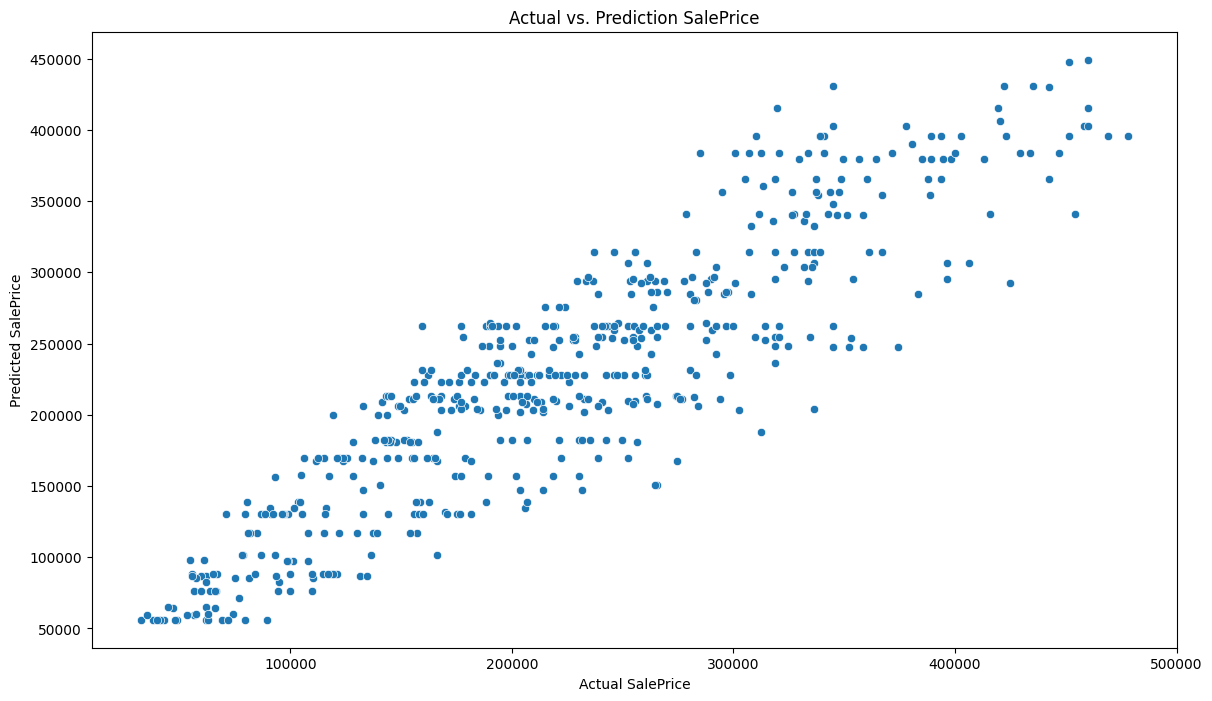

In [57]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction SalePrice',
                                               xlabel='Actual SalePrice',
                                               ylabel='Predicted SalePrice');

Adanya nilai-nilai error yang besar membuat perbedaan yang cukup signifikan antara nilai RMSE dan MAE. Hal ini dapat tergambarkan pula pada plot di atas, di mana terdapat harga jual aktual yang rendah tapi diprediksi lebih tinggi (overestimation), dan juga sebaliknya (underestimation). Akan tetapi, nilai MAPE yang didapat, yaitu sekitar 19% menjadikan model ini dapat dikategorikan ke dalam 'reasonable forecasting' (Lewis, 1982).

*Source: Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting*

####**Feature Importances**

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (SalePrice), kita dapat mengeceknya melalui function feature_importances_.

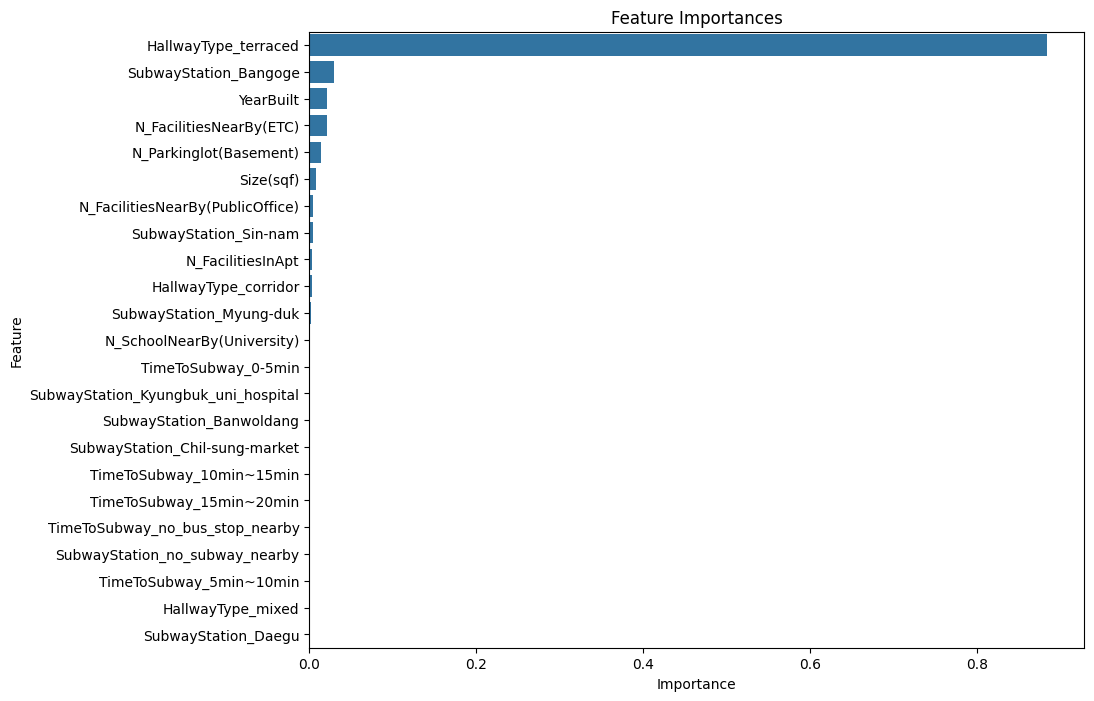

In [58]:
import xgboost as xgb

# Assuming df is your dataframe and 'SalePrice' is the target variable
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

# Identify categorical columns for OneHotEncoding
categorical_columns = ['HallwayType', 'TimeToSubway', 'SubwayStation']  # example categorical columns
numerical_columns = ['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)', 'N_SchoolNearBy(University)',
                     'N_Parkinglot(Basement)', 'YearBuilt', 'N_FacilitiesInApt', 'Size(sqf)']  # numerical columns

# Define the ColumnTransformer to handle one-hot encoding for categorical columns
transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns),
        ('num', 'passthrough', numerical_columns)
    ])

# Apply transformations to the data
X_transformed = transformer.fit_transform(X)

# Convert the transformed data back to a dataframe
# Get feature names for the categorical columns after one-hot encoding
cat_features = transformer.transformers_[0][1].get_feature_names_out(categorical_columns)
# Combine the categorical and numerical features
all_features = list(cat_features) + numerical_columns

# Train an XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_transformed, y)

# Get the feature importances from the trained model
feature_importances = pd.Series(xgb_model.feature_importances_, index=all_features).sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### **Conclusion**

Berdasarkan pemodelan yang sudah dilakukan, fitur 'HallwayType' terutama tipe terraced dan 'N_Parkinglot(Basement) ' menjadi fitur yang paling berpengaruh terhadap 'price'.

 Metrik evaluasi yang digunakan pada model adalah nilai RMSE, MAE & MAPE. Jika ditinjau dari nilai MAPE yang dihasilkan oleh model setelah dilakukan hyperparameter tuning, yaitu sebesar ~19%, kita dapat menyimpulkan bahwa bila nanti model yang kita buat ini digunakan untuk memperkirakan SalePrice listing baru di kota Daaegu pada rentang nilai seperti yang dilatih terhadap model (maksimal harga 517.699 KRW), maka perkiraan harganya rata-rata akan meleset kurang lebih sebesar 19% dari harga seharusnya.

 Tetapi, tidak menutup kemungkinan juga prediksinya meleset lebih jauh karena bias yang dihasilkan model masih cukup tinggi bila dilihat dari visualisasi antara harga aktual dan prediksi. Bias yang dihasilkan oleh model ini dikarenakan oleh terbatasnya fitur pada dataset yang bisa merepresentasikan aspek harga tanah, lokasi tepat seperti di tengah kota atau di sekitar pinggiran, keamanan lingkungan apartemen, serta prospek pembangunan yang akan di bangun ke depannya di sekitar lingkungan apartemen dan faktor - faktor eksternal lainnya.

 Model ini tentu masih dapat diimporvisasi agar dapat menghasilkan prediksi yang lebih baik lagi. Namun, kita dapat melakukan A/B testing terhadap model yang sudah dibuat pada project ini untuk mengetahui tingkat efektifitas penggunaan model terhadap peningkatan jumlah jual listing. Nantinya, dari hasil A/B testing, kita bisa mendapatkan insight lainnya terkait perihal yang bisa dan harus diperbaiki pada model.  

### **Recommendations**

    Lakukan A/B testing untuk menguji tingkat efektivitas model terhadap lakunya listing jual jika dibandingkan dengan host yang menentukan harga jual listingnya sendiri.

Lalu, hal-hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti:

1. Mengecek prediksi mana saja yang memiliki nilai error yang tinggi. Kita dapat mengelompokkan error tersebut ke dalam grup overestimation dan underestimation, lalu memilih 5% error paling ekstrim saja untuk tiap grup. Nantinya pengelompokkan akan menjadi 3 grup, yaitu overestimation (5%), underestimation (5%), dan grup mayoritas yang error-nya mendekati nilai mean (90%). Setelahnya kita bisa mengecek hubungan antara error tersebut dengan tiap variabel independen. Pada akhirnya kita dapat mengetahui sebenarnya variabel mana saja dan aspek apa yang menyebabkan model menghasilkan error yang tinggi, sehingga kita bisa melakukan training ulang dengan penerapan feature engineering lainnya.
<br><br>   
1. Jika memungkinkan, penambahan fitur yang lebih korelatif dengan target ('SalePrice'), seperti harga tanah, keamanan lingkungan, lokasi tepatnya, prospek pembangunan disekitarnya. Selain itu, adanya penambahan data terkini untuk Daegu apartment environment and regulation tentu akan dapat mengimprovisasi kapasitas prediksi dari model.
<br><br>   
3. Jika ada penambahan banyak data, dapat dicoba dengan menggunakan model yang lebih kompleks, seperti recursive neural networks (RNN). Namun, kalau jumlah data dan fiturnya masih seperti dataset ini, kemungkinan besar tidak akan mengubah hasilnya secara signifikan.
<br><br>   
4. Model yang sudah dibangun ini bisa dimanfaatkan untuk pengembangan pembuatan model lainnya. Contohnya seperti pembuatan model untuk memprediksi update harga jual listing untuk listing yang sudah memiliki tingkat kepuasan pembeli. Pembuatan model dengan tujuan seperti ini dapat memanfaatkan data asli rilisan dari platform yang sudah disediakan untuk merilis daftar harga jual apartemen di kota Daegu.  (yang bukan diambil dari Kaggle) yang mungkin memiliki kolom 'Tingkat Kepuasan' dari customer terkait harga jual yang ditawarkan. Jika memang ada, kita dapat melakukan sentiment analysis untuk mendapatkan insight dari review customer tersebut.

    Dalam prosesnya, tiap review dapat di-assign ke dalam -1 (untuk sentimen negatif) dan 1 (untuk sentimen positif). Nantinya, nilai review yang didapat untuk tiap listing yang sama akan dirata-ratakan, sehingga nantinya nilai akhir untuk tiap listing tersebut dapat kita gunakan sebagai fitur pada model. Pada akhirnya, akurasi prediksi dari model pun bisa lebih baik.

### **Save Model**

In [59]:
import pickle

# Simpan model ke dalam file pickle
with open('tuned_xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_tuning, file)

print("Model yang sudah dituning telah disimpan sebagai 'tuned_xgb_model.pkl'")

Model yang sudah dituning telah disimpan sebagai 'tuned_xgb_model.pkl'


### **Load Model**

In [60]:
# Memuat model dari file pickle
with open('tuned_xgb_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Gunakan model yang dimuat untuk prediksi
y_pred_loaded = loaded_model.predict(X_test)

# Hitung metrik menggunakan model yang dimuat
rmse_loaded = np.sqrt(mean_squared_error(y_test, y_pred_loaded))
mae_loaded = mean_absolute_error(y_test, y_pred_loaded)
mape_loaded = mean_absolute_percentage_error(y_test, y_pred_loaded)

print(f"RMSE dari model yang dimuat: {rmse_loaded}")
print(f"MAE dari model yang dimuat: {mae_loaded}")
print(f"MAPE dari model yang dimuat: {mape_loaded}")

RMSE dari model yang dimuat: 43967.93941234744
MAE dari model yang dimuat: 35399.184355580786
MAPE dari model yang dimuat: 0.19035227085827916


###**Contoh Penggunaan Model.**

berikut merupakan dataset yang kita Punya,

- 'HallwayType': ['mixed'],
- 'TimeToSubway': ['10min~15min']
- 'SubwayStation': ['Daegu']
- 'N_FacilitiesNearBy(ETC)': [10]
- 'N_FacilitiesNearBy(PublicOffice)': [5]
- 'N_SchoolNearBy(University)': [3]
- 'N_Parkinglot(Basement)': [2]
- 'YearBuilt': [2005]
- 'N_FacilitiesInApt': [15]
- 'Size(sqf)': [1200]

Selanjutnya kita ingin mengetahui berapa harga jual / SalePrice yang sesuai untuk dataset yang kita miliki menggunakan model yang sudah kita buat.
berikut adalah hasilnya.

In [61]:
model_path = 'tuned_xgb_model.pkl'
loaded_model = pickle.load(open(model_path, 'rb'))

# Contoh satu data fitur (pastikan data disesuaikan dengan transformasi yang digunakan sebelumnya)
# Gunakan fitur seperti di data pelatihan
test_data = pd.DataFrame({
    'HallwayType': ['mixed'],  # Contoh nilai kategorikal
    'TimeToSubway': ['10min~15min'],  # Contoh nilai kategorikal
    'SubwayStation': ['Daegu'],  # Contoh nilai kategorikal
    'N_FacilitiesNearBy(ETC)': [10],  # Numerikal
    'N_FacilitiesNearBy(PublicOffice)': [5],  # Numerikal
    'N_SchoolNearBy(University)': [3],  # Numerikal
    'N_Parkinglot(Basement)': [2],  # Numerikal
    'YearBuilt': [2005],  # Numerikal
    'N_FacilitiesInApt': [15],  # Numerikal
    'Size(sqf)': [1200]  # Numerikal
})

# Prediksi menggunakan model yang telah dilatih
predicted_price = loaded_model.predict(test_data)

# Tampilkan hasil prediksi
print(f"Predicted SalePrice: {predicted_price[0]:,.2f} Won")

Predicted SalePrice: 219,896.62 Won
